From the boostrapping scan files, find the direction with highest n_sigma and find the closest direction in best fit, after which we find the amplitude of H0 variation in the best fit.

# Visualization

In [1]:
# load saved data
import pandas as pd
file_path = '/cosma8/data/do012/dc-he4/analysis_all/h0_direct_compare.csv'
data = pd.read_csv(file_path)

data['Delta_H0'] *= 100
data

,Relations,Delta_H0,Significance,Glon,Glat,Lightcone
0,$L_\mathrm{{X}}-T$,5.184379,2.356872,-40.641361,42.472119,0
1,$L_\mathrm{{X}}-T$,3.766828,1.552214,52.866108,58.861169,1
2,$L_\mathrm{{X}}-T$,2.750494,1.120093,137.559549,44.219754,2
3,$L_\mathrm{{X}}-T$,5.232350,2.252205,103.455472,-22.855878,3
4,$L_\mathrm{{X}}-T$,7.233882,2.261565,45.534447,-30.787983,4
...,...,...,...,...,...,...
5176,$M_\mathrm{{gas}}-T$,1.105246,0.916874,-28.000000,-14.000000,1723
5177,$M_\mathrm{{gas}}-T$,1.104229,0.823058,32.600413,-25.051582,1724
5178,$M_\mathrm{{gas}}-T$,1.106265,0.942347,8.000000,6.000000,1725
5179,$M_\mathrm{{gas}}-T$,1.383472,1.479392,-176.000000,39.000000,1726


In [2]:
# Check data completeness
print(len(data[data['Relations']=='$Y_\\mathrm{{SZ}}-T$']),
      len(data[data['Relations']=='$M_\\mathrm{{gas}}-T$']),
      len(data[data['Relations']=='$L_\\mathrm{{X}}-T$']),
)

1727 1727 1727


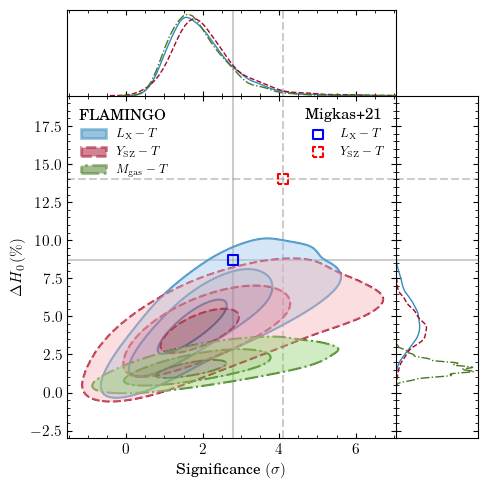

In [14]:
# ---------------------------------------------------------------------------- #
#                                Plot for print                                #
# ---------------------------------------------------------------------------- #

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('./nice.mplstyle')

# set y lim manually. The ylim argument in jointgrid stretch the histogram
# data = data[data['$\\Delta H_0\\,(\\%)$'] < 25]  

colors = ['#348ABD', '#A60628', '#467821']
linestyles = ['solid', '--', '-.']  # solid, densely dashed, densely dashdotdotted https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html

# Create the 2D KDE plot
g = sns.JointGrid(data=data, 
                  x='Significance',
                  y='Delta_H0', 
                  hue='Relations',
                  space=0,
                  ratio=4,
                  height=5,
                  xlim=(-1.55, 7.05),
                  ylim=(-3, 19.5),
                  )

# kde plot missing 3rd level contour if use g.plot_joint, for unknown reason
for relation, color, linestyle in zip(['$L_\\mathrm{{X}}-T$', '$Y_\\mathrm{{SZ}}-T$', '$M_\\mathrm{{gas}}-T$'], 
                            colors, linestyles):

    # Line contours    
    sns.kdeplot(data=data[data['Relations'] == relation], 
                x='Significance',
                y='Delta_H0', 
                #hue='Relations',
                color=color,
                fill=False, 
                levels=(0.011, 0.14, 0.61, 1.), # 3 sigma is 0.011
                bw_adjust=2.5,
                zorder=1,
                linestyles=linestyle,
                linewidths=1.5,
                ax=g.ax_joint
                )

    # Filled contours
    sns.kdeplot(data=data[data['Relations'] == relation], 
                x='Significance',
                y='Delta_H0', 
                #hue='Relations',
                color=color,
                fill=True, 
                levels=(0.011, 0.14, 0.61, 1.), # 3 sigma is 0.011
                bw_adjust=2.5,
                zorder=2,
                alpha=0.4,
                ax=g.ax_joint,
                )

    # Marginal histograms
    sns.kdeplot(data=data[data['Relations'] == relation], 
                x='Significance',
                fill=False,
                color=color,
                linestyle=linestyle,
                ax=g.ax_marg_x
    )
   
    sns.kdeplot(data=data[data['Relations'] == relation], 
                y='Delta_H0',
                fill=False,
                color=color,
                linestyle=linestyle,
                ax=g.ax_marg_y,
    )
# M21 results
x_point = 2.8 # 2.4
y_point = 8.7
g.refline(x=x_point, y=y_point, linestyle=linestyles[0], color='grey', linewidth=1.5, alpha=0.4, zorder=0)
line0 = g.ax_joint.scatter(x_point, y_point, marker='s', s=50, 
    linewidths=1.5, facecolor='none', edgecolors='b', linestyle=linestyles[0],
    label='$L_\\mathrm{{X}}-T$', zorder=10)

#g.ax_joint.axhspan(ymin=8.7-3.1, ymax=8.7+3.1, color='tab:blue', alpha=0.2, zorder=0)

x_point = 4.1 # 2.6
y_point = 14
g.refline(x=x_point, y=y_point, linestyle=linestyles[1], color='grey', linewidth=1.5, alpha=0.4, zorder=0)
line1 = g.ax_joint.scatter(x_point, y_point, marker='s', s=50, 
    linewidths=1.5, facecolor='none', edgecolors='r', linestyle=(2, (4, 1)),
    label='$Y_\\mathrm{{SZ}}-T$', zorder=10)

# Also add the box for the marginal plots
g.ax_marg_x.spines['top'].set_visible(True)
g.ax_marg_x.spines['right'].set_visible(True)
g.ax_marg_x.spines['left'].set_visible(True)
g.ax_marg_x.spines['bottom'].set_visible(True)

g.ax_marg_y.spines['top'].set_visible(True)
g.ax_marg_y.spines['right'].set_visible(True)
g.ax_marg_y.spines['left'].set_visible(True)
g.ax_marg_y.spines['bottom'].set_visible(True)

# # matplotlib doesn't detect the contour correctly, adding it manually
# import matplotlib.patches as mpatches
# contour = mpatches.Patch(color='tab:blue', label='$Y_\\mathrm{{SZ}}-T$')
g.ax_marg_x.legend(handles=[line0, line1], title='Migkas+21', loc='upper right', bbox_to_anchor=(1,0), fontsize=9) # put right corner at 1,0

#sns.move_legend(g.ax_joint, loc='upper right', bbox_to_anchor=(1.7, 0.75), title='FLAMINGO')
from matplotlib.patches import Patch
# Create custom legend for contours
contour_legend_elements = [Patch(facecolor=colors[0], edgecolor=colors[0], linestyle=linestyles[0], linewidth=2, label='$L_\\mathrm{X}-T$', alpha=0.5),
                           Patch(facecolor=colors[1], edgecolor=colors[1], linestyle=linestyles[1], linewidth=2, label='$Y_\\mathrm{SZ}-T$', alpha=0.5),
                           Patch(facecolor=colors[2], edgecolor=colors[2], linestyle=linestyles[2], linewidth=2, label='$M_\\mathrm{gas}-T$', alpha=0.5)]

# Add the custom legend for contours
g.ax_joint.legend(handles=contour_legend_elements, title='FLAMINGO', loc='upper left', fontsize=9)

g.set_axis_labels('Significance $(\\sigma)$', '$\\Delta H_0\\,(\\%)$')
# plt.savefig('./to_paper/h0_scan_hist_LTYTMT.pdf', bbox_inches='tight')
# Show the plot
plt.show()


## KDE estimation of the p-value


In [1]:
# load saved data
import pandas as pd
file_path = '/cosma8/data/do012/dc-he4/analysis_all/h0_direct_compare.csv'
data = pd.read_csv(file_path)

data['Delta_H0'] *= 100
data

,Relations,Delta_H0,Significance,Glon,Glat,Lightcone
0,$L_\mathrm{{X}}-T$,5.184379,2.356872,-40.641361,42.472119,0
1,$L_\mathrm{{X}}-T$,3.766828,1.552214,52.866108,58.861169,1
2,$L_\mathrm{{X}}-T$,2.750494,1.120093,137.559549,44.219754,2
3,$L_\mathrm{{X}}-T$,5.232350,2.252205,103.455472,-22.855878,3
4,$L_\mathrm{{X}}-T$,7.233882,2.261565,45.534447,-30.787983,4
...,...,...,...,...,...,...
5176,$M_\mathrm{{gas}}-T$,1.105246,0.916874,-28.000000,-14.000000,1723
5177,$M_\mathrm{{gas}}-T$,1.104229,0.823058,32.600413,-25.051582,1724
5178,$M_\mathrm{{gas}}-T$,1.106265,0.942347,8.000000,6.000000,1725
5179,$M_\mathrm{{gas}}-T$,1.383472,1.479392,-176.000000,39.000000,1726


In [2]:
# Lx-T
dataset = data[data['Relations']=='$L_\\mathrm{{X}}-T$'][['Delta_H0', 'Significance']]

import numpy as np
import scipy.stats as stats
# gaussian KDE at the point of interest
print(dataset.T.values.shape)
kde = stats.gaussian_kde(dataset.T.values)

x_grid = np.linspace(-15, 40, 500)
y_grid = np.linspace(-5, 21, 500)
X, Y = np.meshgrid(x_grid, y_grid)
positions = np.vstack([X.ravel(), Y.ravel()])
Z = kde(positions).reshape(X.shape)
print(Z.shape)
# print(Z)

# find probability mass above the point of interest
point = np.array([8.7, 2.8])
prob = kde(point)*(x_grid[1]-x_grid[0])*(y_grid[1]-y_grid[0])
prob_mass = Z*(x_grid[1]-x_grid[0])*(y_grid[1]-y_grid[0]) # probability mass in each bin
prob_above = np.sum(prob_mass[prob_mass > prob])
prob_below = np.sum(prob_mass[prob_mass < prob])
print(np.sum(prob_mass))
print(prob_above, prob_below)
print(1-prob_above)
# print(np.sqrt(-2*np.log(1-prob_above)))

(2, 1727)
(500, 500)
1.0000000000000009
0.9789380671759628 0.021061932824038117
0.021061932824037233


In [26]:
# Ysz-T
dataset = data[data['Relations']=='$Y_\\mathrm{{SZ}}-T$'][['Delta_H0', 'Significance']]

import numpy as np
import scipy.stats as stats
# gaussian KDE at the point of interest
print(dataset.T.values.shape)
kde = stats.gaussian_kde(dataset.T.values)

x_grid = np.linspace(-15, 40, 500) # delta H0
y_grid = np.linspace(-5, 25, 500)  # significance
X, Y = np.meshgrid(x_grid, y_grid)
positions = np.vstack([X.ravel(), Y.ravel()])
Z = kde(positions).reshape(X.shape)
print(Z.shape)
# print(Z)

# find probability mass above the point of interest
point = np.array([14, 4.1])
prob = kde(point)*(x_grid[1]-x_grid[0])*(y_grid[1]-y_grid[0])
prob_mass = Z*(x_grid[1]-x_grid[0])*(y_grid[1]-y_grid[0]) # probability mass in each bin
prob_above = np.sum(prob_mass[prob_mass > prob])
prob_below = np.sum(prob_mass[prob_mass < prob])
print(np.sum(prob_mass))
print(prob_above, prob_below)
print(1 - prob_above)
# print(np.sqrt(-2*np.log(1-prob_above)))

(2, 1727)
(500, 500)
0.9999999999999928
0.9999999999999929 2.1112170517607673e-88
7.105427357601002e-15


## KDE estimation, try KDE-diffusion


In [28]:
import pandas as pd
import numpy as np
from kde_diffusion import kde2d

# Load saved data
file_path = '/cosma8/data/do012/dc-he4/analysis_all/h0_direct_compare.csv'
data = pd.read_csv(file_path)
data['Delta_H0'] *= 100

# Filter data for Lx-T relation
dataset = data[data['Relations']=='$L_\\mathrm{{X}}-T$'][['Delta_H0', 'Significance']].values

# Estimate density using kde_diffusion
density, grid, bandwidth = kde2d(dataset[:, 0], dataset[:, 1], n=256, limits=10)

# Define the point of interest
point = np.array([8.7, 2.8])

# Compute the probability density at the point
x_idx = np.searchsorted(grid[0], point[0])
y_idx = np.searchsorted(grid[1], point[1])
prob_density = density[x_idx, y_idx] 

# Compute the p-value
prob_mass = density * (grid[0][1] - grid[0][0]) * (grid[1][1] - grid[1][0])
prob_above = np.sum(prob_mass[density > prob])
p_value = 1 - prob_above
print(f"P-value: {p_value}")

P-value: -0.006110687858745134


In [32]:
# What percent of the grid has P<0?
np.sum(prob_mass<0) / (np.shape(prob_mass)[0] * np.shape(prob_mass)[1])

0.482330322265625

P-value: 0.27830067425834915


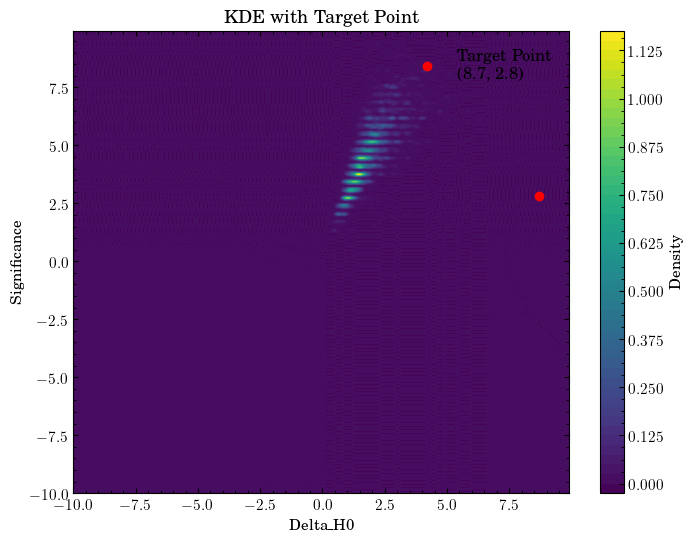

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from kde_diffusion import kde2d

# Load saved data
file_path = '/cosma8/data/do012/dc-he4/analysis_all/h0_direct_compare.csv'
data = pd.read_csv(file_path)
data['Delta_H0'] *= 100

# Filter data for Lx-T relation
dataset = data[data['Relations']=='$L_\\mathrm{{X}}-T$'][['Delta_H0', 'Significance']].values

# Estimate density using kde_diffusion
density, grid, bandwidth = kde2d(dataset[:, 0], dataset[:, 1], n=256, limits=10)

# Define the point of interest
point = np.array([8.7, 2.8])

# Compute the probability density at the point
x_idx = np.searchsorted(grid[0], point[0])
y_idx = np.searchsorted(grid[1], point[1])
prob_density = density[x_idx, y_idx]

# Compute the p-value
prob_mass = density * (grid[0][1] - grid[0][0]) * (grid[1][1] - grid[1][0])
prob_above = np.sum(prob_mass[prob_mass > prob_density])
p_value = 1 - prob_above

print(f"P-value: {p_value}")

# Plot the KDE and the target point
plt.figure(figsize=(8, 6))
plt.contourf(grid[0], grid[1], density, levels=50, cmap='viridis')
plt.colorbar(label='Density')
plt.scatter(point[0], point[1], color='red', label=f'Target Point\n({point[0]}, {point[1]})')
plt.xlabel('Delta_H0')
plt.ylabel('Significance')
plt.title('KDE with Target Point')
plt.legend()
plt.show()